## House Weather Data Analysis

Work out what to do with the data I'm capturing and learn Pandas and Jupyter in the process. Possibly also (re)learn some statistics.

The top level github project for this [is here](https://github.com/users/oisinmulvihill/projects/3).


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [75]:
# Use the first column (timestamp) as the index
df = pd.read_csv('./data/indoor_sample.csv', index_col=0)

In [76]:
df.head()

,90:A2:DA:00:61:58,bme680,2310,44785,101504,311113
2020-06-19T22:25:18.725918,,,,,,
2020-06-19T22:26:26.303364,90:A2:DA:00:61:58,bme680,2307,48250,101561,360705
2020-06-19T22:26:33.113012,90:A2:DA:00:61:58,bme680,2310,47944,101642,274425
2020-06-20T00:09:19.839996,90:A2:DA:00:61:58,bme680,2406,46192,101799,212558
2020-06-20T00:14:19.937346,90:A2:DA:00:61:58,bme680,2405,45726,101799,155522
2020-06-20T00:19:20.034517,90:A2:DA:00:61:58,bme680,2396,46260,101797,139878


In [77]:
df.columns = ['mac', 'type', 't', 'h', 'p', 'g']

### Rename the columns to what indoor_sampler sends

See [sample server API](https://github.com/oisinmulvihill/sample_server#rest-api) endpoint for more details.

- t: temperature, raw integer, C, needs converting to decimal by /100
- h: humidity, raw integer, %, convert to decimal by /1000
- p: pressure, raw integer, hPa, covert to decimal by /100
- g: gas sensor resistance reading, Ohms, raw integer, 50Ω <-> 50kΩ

Details for [BME680 sensor](https://community.bosch-sensortec.com/t5/Knowledge-base/BME680-Sensor-Data-Interpretation/ta-p/8713)

**IAQ Notes**

Rather annoyingly the Indoor Air Quality Score (IAQ) is generated using the manufacturers binary library rather than being open. I will come back around on this later. Some links to aid me possibly [get around using a close source binary](https://github.com/G6EJD/BME680-Example). Alternatively I could just use the [library](https://community.bosch-sensortec.com/t5/Question-and-answers/How-do-I-convert-BME680-gas-resistance-to-IAQ/qaq-p/9050), compile it into my Arduino Ethernet (not sure it will fit) and move on with my life.



In [78]:
df['temperature'] = df.t / 100
df['humidity'] = df.h / 1000
df['pressure'] = df.p / 100
df['gas'] = df.g

In [79]:
df.head()

,mac,type,t,h,p,g,temperature,humidity,pressure,gas
2020-06-19T22:25:18.725918,,,,,,,,,,
2020-06-19T22:26:26.303364,90:A2:DA:00:61:58,bme680,2307,48250,101561,360705,23.07,48.250,1015.61,360705
2020-06-19T22:26:33.113012,90:A2:DA:00:61:58,bme680,2310,47944,101642,274425,23.10,47.944,1016.42,274425
2020-06-20T00:09:19.839996,90:A2:DA:00:61:58,bme680,2406,46192,101799,212558,24.06,46.192,1017.99,212558
2020-06-20T00:14:19.937346,90:A2:DA:00:61:58,bme680,2405,45726,101799,155522,24.05,45.726,1017.99,155522
2020-06-20T00:19:20.034517,90:A2:DA:00:61:58,bme680,2396,46260,101797,139878,23.96,46.260,1017.97,139878


In [80]:
readings = df.loc[:, ['temperature', 'humidity', 'pressure']]

In [81]:
readings.dtypes

temperature    float64
humidity       float64
pressure       float64
dtype: object

In [128]:
# Group by date, slight hack I'm sure I can do better:
group_by_date = df.loc[:, ['temperature', 'humidity', 'pressure']].groupby(df.index.map(lambda x: x[:13]))

In [129]:

def plot(x, y, ax, title, y_label):
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

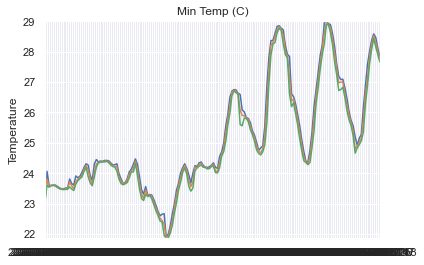

In [130]:
max = group_by_date.max()
mean = group_by_date.mean()
min = group_by_date.min()

fig, ax = plt.subplots()

plot(max.index, max.temperature, ax, 'Max Temp (C)', "Temperature")
plot(mean.index, mean.temperature, ax, 'Avg Temp (C)', "Temperature")
plot(min.index, min.temperature, ax, 'Min Temp (C)', "Temperature")